In [1]:
!pwd
import os
# Change the current working directory to 'sample_data'
os.chdir('/content/sample_data')
# Verify the change by printing the current working directory
print("Current Directory:", os.getcwd())


/content
Current Directory: /content/sample_data


In [2]:
!pwd   #Re-checking
!pip install opencv-python  #Installation of Libraries

/content/sample_data


In [3]:
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread('/content/grayscale_lowres_natural_scene1.png')


In [4]:
import cv2
import numpy as np
from skimage import exposure
from skimage.metrics import structural_similarity as ssim
from skimage.filters import sobel
from skimage.restoration import denoise_nl_means


In [5]:
# Load the image
image_path = '/content/grayscale_lowres_natural_scene1.png'
image = cv2.imread(image_path)

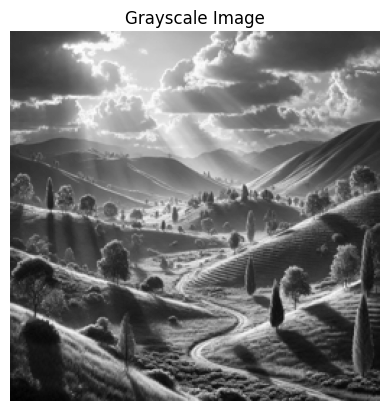

In [6]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the grayscale image using Matplotlib
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Hide axis
plt.show()


(-0.5, 255.5, 255.5, -0.5)

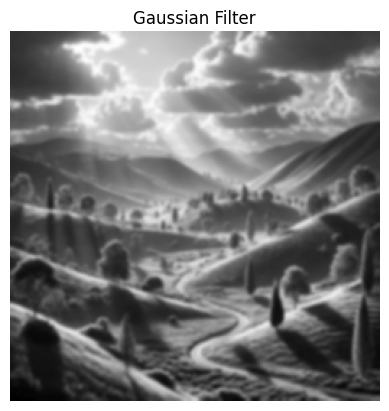

In [7]:
# Apply Gaussian Filter
gaussian_filter = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.subplot()
plt.imshow(gaussian_filter, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

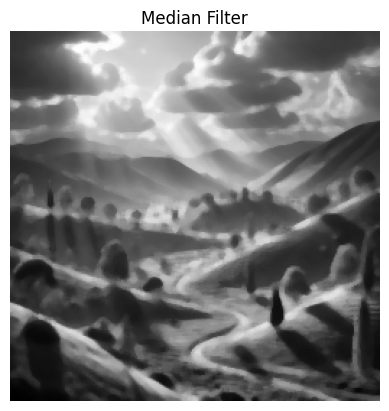

In [8]:
# Apply Median Filter
median_filter = cv2.medianBlur(gray_image, 5)
plt.subplot()
plt.imshow(median_filter, cmap='gray')
plt.title('Median Filter')
plt.axis('off')


(-0.5, 255.5, 255.5, -0.5)

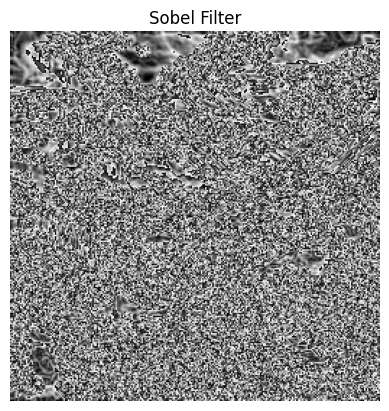

In [9]:
# Apply Sobel Filter
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # X direction
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Y direction
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = np.uint8(np.absolute(sobel_combined))
plt.subplot()
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Filter')
plt.axis('off')


(-0.5, 255.5, 255.5, -0.5)

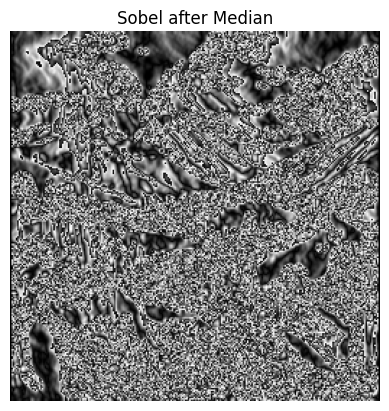

In [10]:
# Apply Median Filter followed by Sobel
median_then_sobel = cv2.medianBlur(gray_image, 5)
sobel_after_median = cv2.Sobel(median_then_sobel, cv2.CV_64F, 1, 0, ksize=5)
sobel_after_median = np.uint8(np.absolute(sobel_after_median))
plt.subplot()
plt.imshow(sobel_after_median, cmap='gray')
plt.title('Sobel after Median')
plt.axis('off')

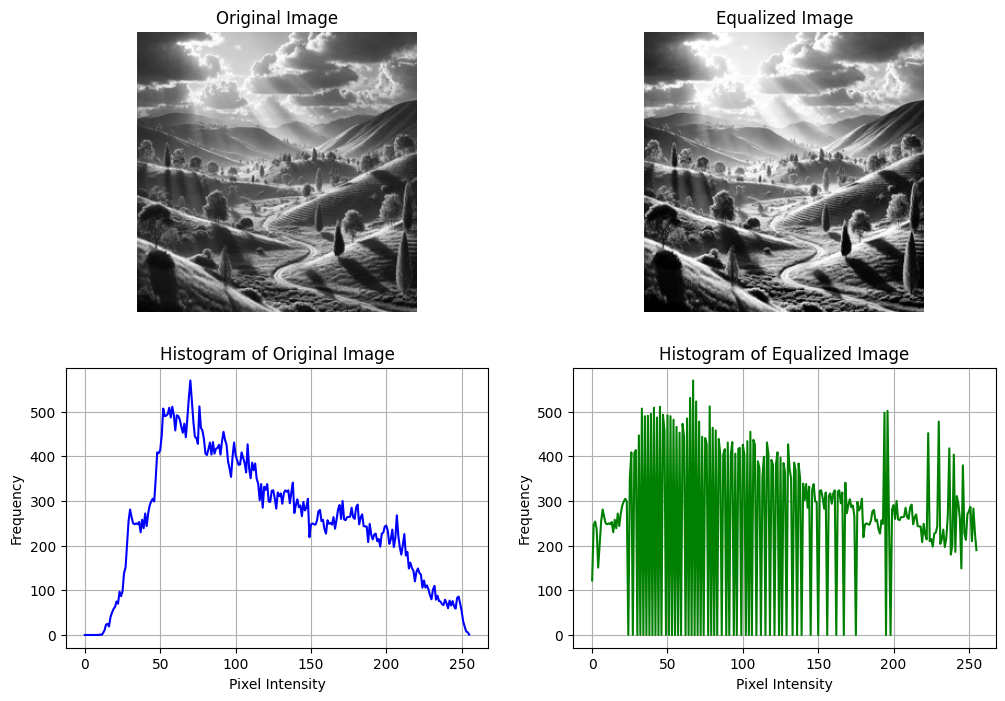

In [11]:
# Apply Histogram Equalization
equalized_img = cv2.equalizeHist(gray_image)
# Calculate the histograms
hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
# Display the original and equalized images and their histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='green')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

plt.show()

In [ ]:
!pip uninstall -y pybrisque
!pip install pybrisque


Found existing installation: pybrisque 1.0
Uninstalling pybrisque-1.0:
  Successfully uninstalled pybrisque-1.0
  Using cached pybrisque-1.0-py3-none-any.whl


In [ ]:
!pip install pypiqe
!pip install brisque
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from pypiqe import piqe
from brisque import BRISQUE

# Functions
def calculate_piqe(image):
    """Calculate the PIQE score for an image."""
    # Convert to float range [0, 1] as required by PIQE
    image_float = img_as_float(image)
    # Convert image_float to uint8 to ensure compatibility with cv2.cvtColor
    image_uint8 = (image_float * 255).astype(np.uint8)
    return piqe(image_uint8) # Use image_uint8 here

def calculate_brisque(image):
    """Calculate the BRISQUE score for an image."""
    brisque = BRISQUE(url=False)
    # Check if the image is grayscale and convert to 3 channels if necessary
    if len(image.shape) == 2:  # Grayscale image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    return brisque.score(img=np.asarray(image))

# Change directory
os.chdir('/content/sample_data')
print("Current Directory:", os.getcwd())

# Load and display the original image
img = cv2.imread('images.png')
if img is None:
    raise FileNotFoundError("Error: Could not load image 'images.png'.")

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply Bilateral Filter
denoised_img = cv2.bilateralFilter(img, d=5, sigmaColor=25, sigmaSpace=25)

# Display original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Mild Denoised Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate PIQE scores
original_piqe_score = calculate_piqe(img)
denoised_piqe_score = calculate_piqe(denoised_img)

# Access the first element of the tuple for printing
print(f"PIQE Score of Original Image: {original_piqe_score[0]:.2f}")
print(f"PIQE Score of Denoised Image: {denoised_piqe_score[0]:.2f}")

# Calculate BRISQUE score for the original image
original_brisque_score = calculate_brisque(img)
print(f"BRISQUE Score of Original Image: {original_brisque_score:.2f}")

# Calculate BRISQUE score for the denoised image
denoised_brisque_score = calculate_brisque(denoised_img)
print(f"BRISQUE Score of Denoised Image: {denoised_brisque_score:.2f}")

# Edge detection using Sobel operator
img2 = cv2.imread('images.png')
if img2 is None:
    raise FileNotFoundError("Error: Could not load image 'images.png'.")

# Apply Sobel operator
sobelx = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Display Sobel edge detection results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off') # Call the axis function within the plt module

plt.tight_layout()
plt.show()

# Calculate PIQE and BRISQUE scores for Sobel edge-detected image
sobel_piqe_score = calculate_piqe(sobel_combined)
print(f"PIQE Score of Sobel Edge-Detected Image: {sobel_piqe_score[0]:.2f}") # Access the first element of the tuple

sobel_brisque_score = calculate_brisque(sobel_combined)
print(f"BRISQUE Score of Sobel Edge-Detected Image: {sobel_brisque_score:.2f}")

# Apply histogram equalization and Canny edge detection
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)
blurred = cv2.GaussianBlur(equalized, (5, 5), 1.4)
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge-Detected Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save and display equalized and Canny edge-detected images
cv2.imwrite('equalized.png', equalized)
cv2.imwrite('edges.png', edges)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate PIQE and BRISQUE scores for the Canny edge-detected image
edges_piqe_score = calculate_piqe(edges)
print(f"PIQE Score of Canny Edge-Detected Image: {edges_piqe_score[0]:.2f}") # Access the first element of the tuple for printing

edges_brisque_score = calculate_brisque(edges)
print(f"BRISQUE Score of Canny Edge-Detected Image: {edges_brisque_score:.2f}")

# Calculate PIQE and BRISQUE scores for the equalized image
equalized_piqe_score = calculate_piqe(equalized)
print(f"PIQE Score of Equalized Image: {equalized_piqe_score[0]:.2f}") # Access the first element of the tuple for printing

equalized_brisque_score = calculate_brisque(equalized)
print(f"BRISQUE Score of Equalized Image: {equalized_brisque_score:.2f}")


ModuleNotFoundError: No module named 'pybrisque'